# Operations on Cloud Imported Data

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt 
import json
from pandas.io.json import json_normalize  

In [2]:
webdata = urllib.request.urlopen("https://api.thingspeak.com/channels/812711/feeds.json?api_key=YZCCUFGP6YRGO0BO")

In [3]:
type(webdata)

http.client.HTTPResponse

In [16]:
response= webdata.read()

In [17]:
mydata=json.loads(response)

The data is written on a file so that it is permanently stored.

In [18]:
with open('my_data.json', 'w') as f: 
    json.dump(mydata, f) 

In [19]:
print(mydata)

{'channel': {'id': 812711, 'name': 'Monitoring Environment', 'latitude': '0.0', 'longitude': '0.0', 'field1': 'Temperature', 'field2': 'Humidity', 'created_at': '2019-06-29T08:23:42Z', 'updated_at': '2019-06-29T08:23:42Z', 'last_entry_id': 160}, 'feeds': [{'created_at': '2019-07-24T08:25:07Z', 'entry_id': 61, 'field1': '30.00', 'field2': '65.00'}, {'created_at': '2019-07-24T08:25:33Z', 'entry_id': 62, 'field1': '30.00', 'field2': '65.00'}, {'created_at': '2019-07-24T08:25:59Z', 'entry_id': 63, 'field1': '30.00', 'field2': '65.00'}, {'created_at': '2019-07-24T08:26:25Z', 'entry_id': 64, 'field1': '30.00', 'field2': '65.00'}, {'created_at': '2019-07-24T08:26:51Z', 'entry_id': 65, 'field1': '30.00', 'field2': '64.00'}, {'created_at': '2019-07-24T08:27:17Z', 'entry_id': 66, 'field1': '30.00', 'field2': '64.00'}, {'created_at': '2019-07-24T08:27:43Z', 'entry_id': 67, 'field1': '30.00', 'field2': '64.00'}, {'created_at': '2019-07-24T08:28:10Z', 'entry_id': 68, 'field1': '30.00', 'field2': '6

In [29]:
mydata["channel"]

{'id': 812711,
 'name': 'Monitoring Environment',
 'latitude': '0.0',
 'longitude': '0.0',
 'field1': 'Temperature',
 'field2': 'Humidity',
 'created_at': '2019-06-29T08:23:42Z',
 'updated_at': '2019-06-29T08:23:42Z',
 'last_entry_id': 160}

In [30]:
mydata["channel"]["id"]

812711

In [31]:
mydata["channel"]["field1"]

'Temperature'

In [32]:
mydata["feeds"][0]["created_at"]

'2019-07-24T08:25:07Z'

The minimum and maximum values of various attributes of is calculated.

In [33]:
min(mydata["feeds"][x]["entry_id"] for x in range(len(mydata["feeds"])))

61

In [34]:
max(mydata["feeds"][x]["entry_id"] for x in range(len(mydata["feeds"])))

160

In [35]:
min(mydata["feeds"][x]["field1"] for x in range(len(mydata["feeds"])))

'29.00'

In [36]:
new = pd.DataFrame(mydata['feeds'])

In [37]:
print(new)

              created_at  entry_id field1 field2
0   2019-07-24T08:25:07Z        61  30.00  65.00
1   2019-07-24T08:25:33Z        62  30.00  65.00
2   2019-07-24T08:25:59Z        63  30.00  65.00
3   2019-07-24T08:26:25Z        64  30.00  65.00
4   2019-07-24T08:26:51Z        65  30.00  64.00
5   2019-07-24T08:27:17Z        66  30.00  64.00
6   2019-07-24T08:27:43Z        67  30.00  64.00
7   2019-07-24T08:28:10Z        68  30.00  64.00
8   2019-07-24T08:28:37Z        69  30.00  64.00
9   2019-07-24T08:29:03Z        70  30.00  64.00
10  2019-07-24T08:29:29Z        71  30.00  64.00
11  2019-07-24T08:29:56Z        72  30.00  64.00
12  2019-07-24T08:30:22Z        73  30.00  75.00
13  2019-07-24T08:30:48Z        74  30.00  68.00
14  2019-07-24T08:31:14Z        75  30.00  64.00
15  2019-07-24T08:31:40Z        76  30.00  64.00
16  2019-07-24T08:32:07Z        77  30.00  64.00
17  2019-07-24T08:32:33Z        78  30.00  64.00
18  2019-07-24T08:33:00Z        79  30.00  64.00
19  2019-07-24T08:33

In [38]:
new.head()

,created_at,entry_id,field1,field2
0,2019-07-24T08:25:07Z,61,30.00,65.00
1,2019-07-24T08:25:33Z,62,30.00,65.00
2,2019-07-24T08:25:59Z,63,30.00,65.00
3,2019-07-24T08:26:25Z,64,30.00,65.00
4,2019-07-24T08:26:51Z,65,30.00,64.00


Also the graphical relationship can be shown of the values to analyse the behaviour of the values as the increase or decrease.

Text(0, 0.5, 'humidity')

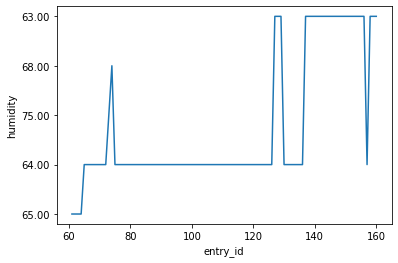

In [39]:
plt.plot(new['entry_id'], new['field2'])
plt.xlabel('entry_id')
plt.ylabel('humidity')

Text(0, 0.5, 'humidity')

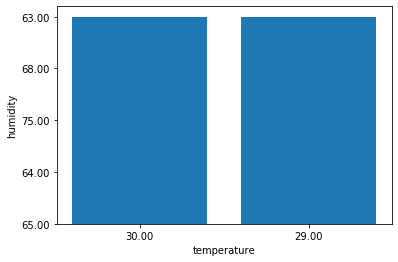

In [40]:
plt.bar(new['field1'], new['field2'])
plt.xlabel("temperature")
plt.ylabel("humidity")

Text(0, 0.5, 'humidity')

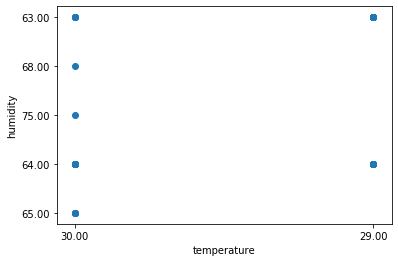

In [42]:
plt.scatter(new['field1'], new['field2'])
plt.xlabel("temperature")
plt.ylabel("humidity")